In [88]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import tqdm

In [44]:
#X is the system state vector 
#the function takes as input a start time t and the assocate system state vector at t 
#function computes dX
def lotka_volterra(t, X):
    #data init 
    x_1, x_2 =X
    #set constants  
    a=1.3
    b=0.9
    c=0.8
    d=1.8
    #system of ODE
    dX=np.array([
        a*x_1-b*x_1*x_2,
        c*x_1*x_2-d*x_2
    ])
    return dX
#output is an array with two entries dx and ddy computed at dt 

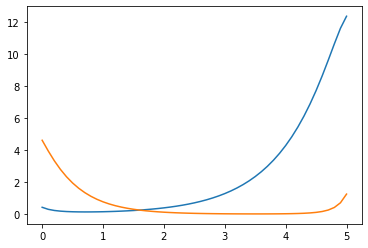

In [45]:
#first arg is the function whose output is the ode system,
#next are the initial conditions, start/end times, timestep 
#returns t and X for each iteration where t is the iteration and X is an array
et, ex = ode.euler(lotka_volterra, [0.44249296, 4.6280594], [0,5], 0.1)
ex1, ex2=ex 

#same init, returns t and x
bet, bex = ode.backwardeuler(lotka_volterra, [0.44249296, 4.6280594], [0,5], 0.1)
bex1, bex2,= bex

time=np.arange(0,5.1,0.1)
plt.plot(time,ex1)
plt.plot(time,ex2)


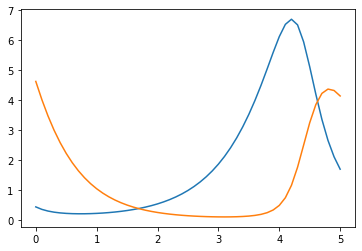

In [46]:
plt.plot(time,bex1)
plt.plot(time,bex2)


In [47]:
#try another ODE solver 
t_init=0
times= np.arange(0, 20.1, 0.1)
results = tfp.math.ode.BDF().solve(lotka_volterra, t_init, [0.44249296, 4.6280594], solution_times=times)



In [48]:
len(results)

4

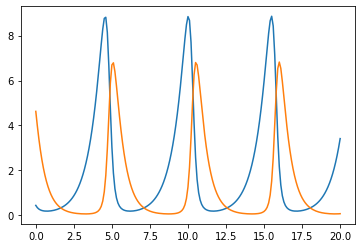

In [49]:
plt.plot(times,results[1][0])
plt.plot(times,results[1][1])


In [50]:
#Next, store this data as the Dataset 
N_x=results[1][0]
N_y=results[1][1]
N=len(results[1][0])
N_x=N_x.numpy()
N_x=N_x.tolist()

N_y=N_y.numpy()
N_y=N_y.tolist()


In [51]:
#define the function as a neural network ie dX now computed via NN
'''def lotka_volterra_nn(t, X):
    #data init 
    x_1, x_2 =X
    data=np.array([[x_1, x_2]])
    model = keras.Sequential([
    keras.layers.Dense(2),    
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])
    dX=model(data)
    dX=dX.numpy()
    dX=dX.tolist()
    return dX
'''

"def lotka_volterra_nn(t, X):\n    #data init \n    x_1, x_2 =X\n    data=np.array([[x_1, x_2]])\n    model = keras.Sequential([\n    keras.layers.Dense(2),    \n    #keras.layers.Flatten(input_shape=(28, 28)),\n    keras.layers.Dense(32, activation='relu'),\n    keras.layers.Dense(2)\n])\n    dX=model(data)\n    dX=dX.numpy()\n    dX=dX.tolist()\n    return dX\n"

In [52]:
model = keras.Sequential([
    keras.layers.Dense(2),    
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])

In [53]:
def lotka_volterra_nn(t, X):
    #data init 
    x_1, x_2 = X
    data=np.array([[x_1, x_2]])
    dX=model(data)
    dX=dX.numpy()
    dX=dX.tolist()
    return dX

In [54]:
#Use the ODE solver to compute X from dX
t_init=0
times= np.arange(0, 20.1, 0.1)
nn_results = tfp.math.ode.BDF().solve(lotka_volterra, t_init, [0.44249296, 4.6280594], solution_times=times)
nn_results


Results(times=<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 1

In [55]:
#next use the MSE in order to compute new weights i.e. update model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])
#model.fit(train_images, train_labels, epochs=10)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(2),    
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])

#next use the MSE in order to compute new weights i.e. update model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error, 
              metrics=['accuracy'])
#N is the size of the training set

#for i in range(N):
for i in range(2):   
    #Use the ODE solver to compute X from dX
    t_init=0
    times= np.arange(0, 20.1, 0.1)
    nn_results = tfp.math.ode.BDF().solve(lotka_volterra, t_init, [0.44249296, 4.6280594], solution_times=times)
    
    out_x=results[i][0].numpy()
    out_y=results[i][1].numpy()

    out_x=out_x.tolist()
    out_y=out_y.tolist()
    
    
    train_label=np.array([N_x[i], N_y[i]])
    train_data=np.array([out_x[i], out_y[i]])

    model.fit(train_data, train_label, epochs=10)


TypeError: 'float' object is not subscriptable

### Justin implementation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import tqdm

Solve Lotka-Volterra equations to generate "training data"

In [28]:
# gradient function defining system of ODEs
def dvdt_lotka_volterra(t, v):
    
    # model set-up constants 
    a=1.3
    b=0.9
    c=0.8
    d=1.8
    
    # individual state variables
    v_1, v_2 = v
    
    # gradients
    dv1dt = a*v_1 - b*v_1*v_2
    dv2dt = c*v_1*v_2 - d*v_2

    return np.array([dv1dt, dv2dt])

# solve ODEs:

ODESolver = tfp.math.ode.DormandPrince()

# initial conditions and time grid
t_initial = 0 # initial time
t_final = 20 # final time
n_times = 100 # number of time steps to churn out solution for
times = np.linspace(t_initial, t_final, n_times).astype(np.float32) # time grid for where to spit out solutions for
v_initial = np.array([0.44249296, 4.6280594]).astype(np.float32) # initial state vector

# integrate the ODE
results = ODESolver.solve(dvdt_lotka_volterra, # system of ODEs (gradient function)
                                   t_initial, # initial time
                                   v_initial, # initial state
                                   solution_times=times) # time grid to spit out solutions for

# extract results for the state solutions v(t)
data = tf.cast(tf.stack(results.states, axis=-1), tf.float32)

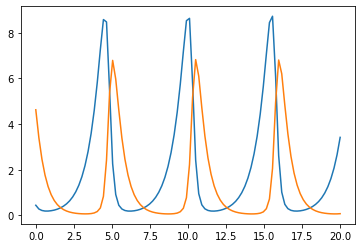

In [29]:
# plot the solved ODE
plt.plot(times, data[0,:].numpy())
plt.plot(times, data[1,:].numpy())
plt.show()

Define neural network for the gradient function

In [6]:
# weights and biases:
n_state = 2
n_hidden = 32
W1 = tf.Variable(tf.random.normal([n_state, n_hidden], 0, 0.1),  trainable=True)
b1 = tf.Variable(tf.random.normal([n_hidden], 0, 0.1),  trainable=True)
W2 = tf.Variable(tf.random.normal([n_hidden, n_state], 0, 0.1),  trainable=True)
b2 = tf.Variable(tf.random.normal([n_state], 0, 0.1),  trainable=True)

def dvdt_nn(t, v):
    
    #dvdt = tf.matmul(tf.tanh(tf.matmul(tf.expand_dims(v, axis=0), W1) + b1), W2) + b2
    output=tf.matmul(tf.expand_dims(v, axis=0), W1) + b1
    dvdt = tf.matmul(tf.nn.leaky_relu(output, alpha=0.2, name=None), W2) + b2
    
    return tf.squeeze(dvdt, axis=0)

Set up optimizer and loss function, and training step function

In [7]:
# choose optimizer
optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

# training step: computes predictions, compute MSE between predictions and data, computes gradients and applies them to the parameters
def training_step():
    
    # start the gradient tape: this records all operations in a way that gradients can be taken
    with tf.GradientTape() as tape:
        
        # solve the ODE
        predictions = tf.stack(ODESolver.solve(dvdt_nn,
                                   t_initial,
                                   v_initial,
                                   solution_times=times).states, axis=-1)
        
        # calculate loss
        loss = tf.reduce_mean(tf.math.squared_difference(predictions, data))
        
    # calculate gradients
    gradients = tape.gradient(loss, tape.watched_variables())
    
    # make gradient step
    optimizer.apply_gradients(zip(gradients, tape.watched_variables()))   
    
    return loss

Train the mofo

In [8]:
# list to keep the loss values for plotting later (to see if it's converged)
losses = []

# number of trainine epochs
n_epochs = 200

# progressbar
pbar = tqdm.tqdm_notebook(total = n_epochs, desc = "Optimizing")
pbar.set_postfix(ordered_dict={"loss":None}, refresh=True)

# train it! loop over epochs, doing a gradient update each step
for i in range(n_epochs):
    
    loss = training_step()
    losses.append(loss.numpy())
    
    # update progressbar
    pbar.update()
    pbar.set_postfix(ordered_dict={"loss":loss.numpy()}, refresh=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


HBox(children=(FloatProgress(value=0.0, description='Optimizing', max=200.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


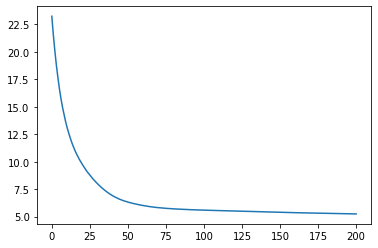

In [9]:
#Plot the lose function with tanh

plt.plot(np.linspace(0, 200, 200), losses)


In [10]:
predictions = tf.stack(ODESolver.solve(dvdt_nn,
                                   t_initial,
                                   v_initial,
                                   solution_times=times).states, axis=-1)

In [11]:
predictions

<tf.Tensor: shape=(2, 100), dtype=float32, numpy=
array([[0.44249296, 0.5398153 , 0.6333458 , 0.72321343, 0.8095431 ,
        0.8924553 , 0.9721013 , 1.0487411 , 1.1223825 , 1.1930063 ,
        1.260607  , 1.3251934 , 1.3867882 , 1.4454283 , 1.5011643 ,
        1.5540609 , 1.6041974 , 1.651666  , 1.696574  , 1.7390418 ,
        1.7792046 , 1.8172114 , 1.8532096 , 1.8872663 , 1.9194337 ,
        1.9497722 , 1.9783427 , 2.0052059 , 2.030423  , 2.0540552 ,
        2.0761647 , 2.0968132 , 2.1160629 , 2.1339765 , 2.1506162 ,
        2.1660452 , 2.1803272 , 2.193525  , 2.2057028 , 2.2169247 ,
        2.2272544 , 2.2367568 , 2.2454896 , 2.2534533 , 2.2606523 ,
        2.2670903 , 2.272772  , 2.2777038 , 2.2818937 , 2.2853515 ,
        2.2880876 , 2.2901149 , 2.2914472 , 2.2921    , 2.2920904 ,
        2.291437  , 2.2901597 , 2.28828   , 2.2858214 , 2.282808  ,
        2.2792664 , 2.2752237 , 2.2707093 , 2.265754  , 2.2603896 ,
        2.2546496 , 2.24857   , 2.2421882 , 2.2354844 , 2.2284284 

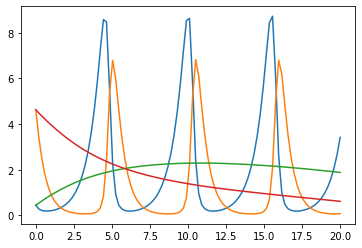

In [23]:
plt.plot(times, data[0,:].numpy())
plt.plot(times, data[1,:].numpy())
plt.plot(times, predictions[0,:].numpy())
plt.plot(times, predictions[1,:].numpy())

plt.show()

In [19]:
predictions[0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.44249296, 0.5398153 , 0.6333458 , 0.72321343, 0.8095431 ,
       0.8924553 , 0.9721013 , 1.0487411 , 1.1223825 , 1.1930063 ,
       1.260607  , 1.3251934 , 1.3867882 , 1.4454283 , 1.5011643 ,
       1.5540609 , 1.6041974 , 1.651666  , 1.696574  , 1.7390418 ,
       1.7792046 , 1.8172114 , 1.8532096 , 1.8872663 , 1.9194337 ,
       1.9497722 , 1.9783427 , 2.0052059 , 2.030423  , 2.0540552 ,
       2.0761647 , 2.0968132 , 2.1160629 , 2.1339765 , 2.1506162 ,
       2.1660452 , 2.1803272 , 2.193525  , 2.2057028 , 2.2169247 ,
       2.2272544 , 2.2367568 , 2.2454896 , 2.2534533 , 2.2606523 ,
       2.2670903 , 2.272772  , 2.2777038 , 2.2818937 , 2.2853515 ,
       2.2880876 , 2.2901149 , 2.2914472 , 2.2921    , 2.2920904 ,
       2.291437  , 2.2901597 , 2.28828   , 2.2858214 , 2.282808  ,
       2.2792664 , 2.2752237 , 2.2707093 , 2.265754  , 2.2603896 ,
       2.2546496 , 2.24857   , 2.2421882 , 2.2354844 , 2.2284284 ,
       2.22102

In [20]:
predictions[1]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([4.6280594 , 4.4858737 , 4.348394  , 4.215455  , 4.086899  ,
       3.9625716 , 3.842266  , 3.7255876 , 3.6125858 , 3.5033557 ,
       3.3979669 , 3.2964633 , 3.1988635 , 3.1051612 , 3.0153236 ,
       2.929293  , 2.8469856 , 2.7682931 , 2.6930811 , 2.6211898 ,
       2.5524337 , 2.4866018 , 2.4234607 , 2.3628314 , 2.3046324 ,
       2.2487874 , 2.1952178 , 2.1438434 , 2.0945833 , 2.0473542 ,
       2.0020723 , 1.9586515 , 1.9170051 , 1.877044  , 1.8386782 ,
       1.8018165 , 1.7663653 , 1.7322308 , 1.6993166 , 1.6675258 ,
       1.6367592 , 1.6069164 , 1.577933  , 1.5498141 , 1.5225408 ,
       1.4960876 , 1.4704275 , 1.4455346 , 1.4213815 , 1.3979406 ,
       1.3751843 , 1.3530842 , 1.3316115 , 1.3107371 , 1.2904315 ,
       1.2706648 , 1.2514064 , 1.2326255 , 1.2142912 , 1.1963716 ,
       1.1788348 , 1.1616483 , 1.1447791 , 1.128194  , 1.1118593 ,
       1.0957409 , 1.0798044 , 1.0640155 , 1.048388  , 1.0329472 ,
       1.01768

In [30]:
def coef_nn(t,v):
    a=tf.Variable(initial_value=1.2)
    b=tf.Variable(initial_value=0.8)
    c=tf.Variable(initial_value=0.7)
    d=tf.Variable(initial_value=1.7)
    
    #a=1.3
    #b=0.9
    #c=0.8
    #d=1.8
    
    # individual state variables
    v_1, v_2 = v
    
    # gradients
    dv1dt = a*v_1 - b*v_1*v_2
    dv2dt = c*v_1*v_2 - d*v_2

    return np.array([dv1dt, dv2dt])

In [31]:
# choose optimizer
optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

# training step: computes predictions, compute MSE between predictions and data, computes gradients and applies them to the parameters
def training_step():
    
    # start the gradient tape: this records all operations in a way that gradients can be taken
    with tf.GradientTape() as tape:
        
        # solve the ODE
        predictions = tf.stack(ODESolver.solve(coef_nn,
                                   t_initial,
                                   v_initial,
                                   solution_times=times).states, axis=-1)
        
        # calculate loss
        loss = tf.reduce_mean(tf.math.squared_difference(predictions, data))
        
    # calculate gradients
    gradients = tape.gradient(loss, tape.watched_variables())
    
    # make gradient step
    optimizer.apply_gradients(zip(gradients, tape.watched_variables()))   
    
    return loss

In [32]:
# list to keep the loss values for plotting later (to see if it's converged)
losses = []

# number of trainine epochs
n_epochs = 200

# progressbar
pbar = tqdm.tqdm_notebook(total = n_epochs, desc = "Optimizing")
pbar.set_postfix(ordered_dict={"loss":None}, refresh=True)

# train it! loop over epochs, doing a gradient update each step
for i in range(n_epochs):
    
    loss = training_step()
    losses.append(loss.numpy())
    
    # update progressbar
    pbar.update()
    pbar.set_postfix(ordered_dict={"loss":loss.numpy()}, refresh=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


HBox(children=(FloatProgress(value=0.0, description='Optimizing', max=200.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

KeyboardInterrupt: 

### Naïri Leapefrog

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import tqdm

In [78]:
# gradient function defining system of ODEs
def dvdt_lotka_volterra(t, v):    
    # model set-up constants 
    a=1.3
    b=0.9
    c=0.8
    d=1.8
    
    # individual state variables
    v_1, v_2 = v
    
    # gradients
    dv1dt = a*v_1 - b*v_1*v_2
    dv2dt = c*v_1*v_2 - d*v_2

    return np.array([dv1dt, dv2dt])

# solve ODEs:

ODESolver = tfp.math.ode.DormandPrince()

# initial conditions and time grid
t_initial = 0 # initial time
t_final = 20 # final time
n_times = 100 # number of time steps to churn out solution for
times = np.linspace(t_initial, t_final, n_times).astype(np.float32) # time grid for where to spit out solutions for
v_initial = np.array([0.44249296, 4.6280594]).astype(np.float32) # initial state vector

# integrate the ODE
results = ODESolver.solve(dvdt_lotka_volterra, # system of ODEs (gradient function)
                                   t_initial, # initial time
                                   v_initial, # initial state
                                   solution_times=times) # time grid to spit out solutions for

# extract results for the state solutions v(t)
data = tf.cast(tf.stack(results.states, axis=-1), tf.float32)

In [79]:
def euler(v0, T, N=10000):
    t = np.linspace(0,T,N)
    dt = t[1] - t[0] 
    v = np.array([[0.0]*2 for i in range(N)])
    a = np.array([[0.0]*2 for i in range(N)])

    # initial conditions
    v[0] = v0
    for i in range(N-1):
        v[i + 1] = v[i] + dt*dvdt_lotka_volterra(i,v[i])
    
    return v[-1]

In [80]:
rough=euler(v_initial,20)
#Final time is 20
rough

array([2.60712948, 0.05374019])

In [84]:
from torchdiffeq import odeint_adjoint as odeint
import torch
import torch.nn as nn


# NN

In [85]:
class ODE_fun(nn.Module):
    # input the initial values of the a, b, c, d parameters when you initialize it
    def __init__(self, a0, b0, c0, d0):

        super(ODE_fun, self).__init__()
       
        # LV parameters as trainable parameters (initialized to the values you feed in)
        self.a = nn.Parameter(torch.Tensor(a0))
        self.b = nn.Parameter(torch.Tensor(b0))
        self.c = nn.Parameter(torch.Tensor(c0))
        self.d = nn.Parameter(torch.Tensor(d0))

    # this is the actual gradient function, ie., takes v and t and returns dvdt
    def forward(self, v, t):
        
         # individual state variables
        v_1, v_2 = v
    
        # gradients
        dv1dt = a*v_1 - b*v_1*v_2
        dv2dt = c*v_1*v_2 - d*v_2

        # your code for the gradient function goes in here!

        # return the gradient function
        return np.array([dv1dt, dv2dt])

In [116]:
# initial conditions and time grid
t_initial = 0 # initial time
t_final = 20 # final time
n_times = 100 # number of time steps to churn out solution for
times = np.linspace(t_initial, t_final, n_times).astype(np.float32) # time grid for where to spit out solutions for
v_initial = np.array([0.44249296, 4.6280594]).astype(np.float32) # initial state vector

func=ODE_fun(a0=np.array([1.3]), b0=np.array([0.9]), c0=np.array([0.8]), d0=np.array([1.8]))


# integrate the ODE
results = odeint(func,
                 torch.from_numpy(v_initial),
                 t=torch.linspace(t_initial, t_final, n_times),
                atol=1e-5,
                rtol=1e-5,
                method='dopri5') 

# extract results for the state solutions v(t)
#data = tf.cast(tf.stack(results.states, axis=-1), tf.float32)

TypeError: iteration over a 0-d tensor